그래프
- 데이터의구조와 패턴 파악
- 다양한 관점에서 데이터에 관한 통찰력 제공

Matplotlib
- 파이썬 표준 시각화 도구
- 객체지향 프로그래밍을 지원

선 그래프
- 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 그림
- 연속적인 값의 변화와 패턴을 파악

   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

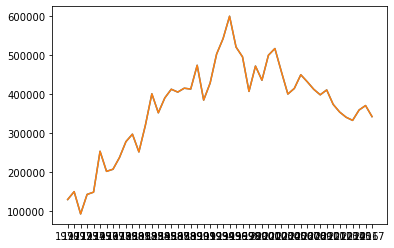

In [20]:
#<예제4-1> 선그래프

import pandas as pd
import matplotlib.pyplot as plt # 데이터 시각화에사용될 모듈

df = pd.read_excel("./시도별 전출입 인구수.xlsx",fillna = 0, header = 0) # fillna =0  :  , header= 0 : 0행을 열 이름으로 지정한다.

print(df.head())

# "전출지별" 열 에서의 누락 데이터(NaN) 처리 -> 셀 병합으로  인해 일어남.
# fillna() 메소드의 method ="ffill" 옵션 : 누락데이터의 바로 앞에 위치한 행의 데이터로 바꾼다.
df = df.fillna(method = "ffill")

# 서울에서다른 지역으로 이동한 데이터만 추출하여 df_seoul 에 정리
mask = (df["전출지별"] =="서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]

# "전출지별" 열 삭제
df_seoul = df_seoul.drop(["전출지별"], axis =1) 

# "전입지별" 열 이름을 "전입지"로 변경
df_seoul.rename({"전입지별":"전입지"},axis =1, inplace = True)

# "전입지" 열을 행  인덱스로 지정
df_seoul.set_index(["전입지"],inplace = True)

print(df_seoul)

# 전입지가 "경기도"인 행 데이터를선택하여 sr_one에 저장한다.
sr_one = df_seoul.loc["경기도"]

# 선그래프 그리기
# plt.plot(x축 데이터, y축 데이터)
plt.plot(sr_one.index,sr_one.values)

# plt.plot(시리즈 또는 데이터프레임)
plt.plot(sr_one)

   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

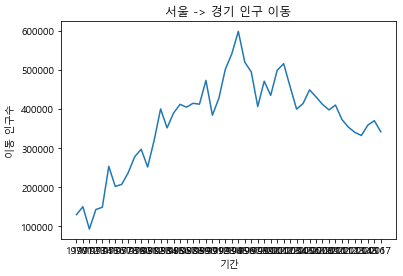

In [25]:
#<예제 4-2> 차트 제복, 축 이름 추가
#<예제4-3> 한글 폰트 오류 해결

import pandas as pd
import matplotlib.pyplot as plt # 데이터 시각화에사용될 모듈

# matplotlib 한글 폰트 문제 오류 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf" # 폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family = font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx",fillna = 0, header = 0) # fillna =0  :  , header= 0 : 0행을 열 이름으로 지정한다.

print(df.head())
df = df.fillna(method = "ffill")
mask = (df["전출지별"] =="서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"], axis =1) 
df_seoul.rename({"전입지별":"전입지"},axis =1, inplace = True)
df_seoul.set_index(["전입지"],inplace = True)

sr_one = df_seoul.loc["경기도"]

# 선그래프 그리기
# plt.plot(x축 데이터, y축 데이터)
plt.plot(sr_one.index,sr_one.values)

# 차트 제목 추가
plt.title("서울 -> 경기 인구 이동")

# 축 이름 추가
plt.xlabel("기간")
plt.ylabel("이동 인구수")

# 변경사항 저장하고 출력
plt.show()


그래프꾸미기
- x축 눈금 라벨이 서로겹쳐 있음
    - figure() 함수로 가로 사이즈를 더 넓게만든다.
    - xticks() 함수로 x축 눈급 라벨을 반시계 방향 회전한다.

   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

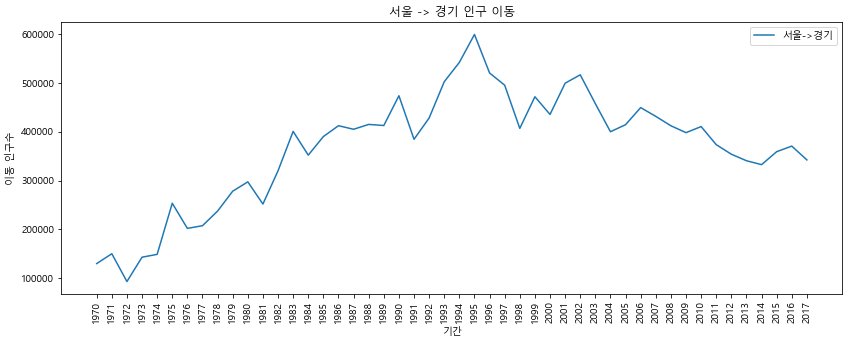

In [26]:
# <예제4-4> 그래프 꾸미기

import pandas as pd
import matplotlib.pyplot as plt # 데이터 시각화에사용될 모듈

# matplotlib 한글 폰트 문제 오류 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf" # 폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family = font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx",fillna = 0, header = 0) # fillna =0  :  , header= 0 : 0행을 열 이름으로 지정한다.

print(df.head())
df = df.fillna(method = "ffill")
mask = (df["전출지별"] =="서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"], axis =1) 
df_seoul.rename({"전입지별":"전입지"},axis =1, inplace = True)
df_seoul.set_index(["전입지"],inplace = True)

#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc["경기도"]

# 그림 사이즈 지정 (가로 14인치, 세로 5인치)
#figure() 함수 사용
plt.figure(figsize =(14,5))

# x축눈금라벨 회전하기
#xticks 함수 사용
plt.xticks(rotation = "vertical")

# 선그래프 그리기
# plt.plot(x축 데이터, y축 데이터)
plt.plot(sr_one.index,sr_one.values)

# 차트 제목 추가
plt.title("서울 -> 경기 인구 이동")

# 축 이름 추가
plt.xlabel("기간")
plt.ylabel("이동 인구수")

# 범례 표시
plt.legend(labels = ["서울->경기"], loc= "best")
# 변경사항 저장하고 출력
plt.show()

Matplolib의 스타일 서식 지정
- 색, 폰트 등 디자인적 요소를 사전지정
- 단, 다른 파일을 실행할때도 유지

   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

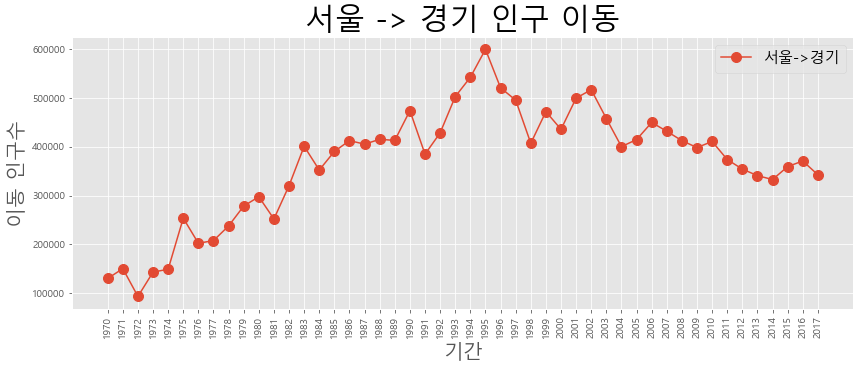

In [28]:
#<예제4-5> 스타일 서식 지정 등

import pandas as pd
import matplotlib.pyplot as plt # 데이터 시각화에사용될 모듈

# matplotlib 한글 폰트 문제 오류 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf" # 폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family = font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx",fillna = 0, header = 0) # fillna =0  :  , header= 0 : 0행을 열 이름으로 지정한다.

print(df.head())
df = df.fillna(method = "ffill")
mask = (df["전출지별"] =="서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"], axis =1) 
df_seoul.rename({"전입지별":"전입지"},axis =1, inplace = True)
df_seoul.set_index(["전입지"],inplace = True)

#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc["경기도"]

# 스타일 서식 지정
plt.style.use("ggplot")

plt.figure(figsize =(14,5))
plt.xticks(rotation = "vertical")

# 선그래프 그리기
# 마커표시 추가
plt.plot(sr_one.index,sr_one.values, marker = "o", markersize = 10)

# 차트 제목 추가
plt.title("서울 -> 경기 인구 이동",size = 30)
# 축 이름 추가
plt.xlabel("기간", size = 20)
plt.ylabel("이동 인구수",size = 20)

# 범례 표시
plt.legend(labels = ["서울->경기"], loc= "best", fontsize = 15)
# 변경사항 저장하고 출력
plt.show()

주석 달기
- annotate() 함수를 사용
    - arrowprops 옵션 : 화살표 표시

   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

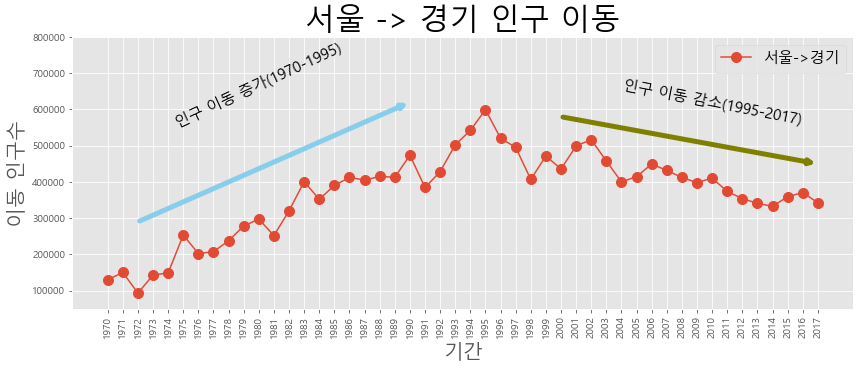

In [33]:
import pandas as pd
import matplotlib.pyplot as plt # 데이터 시각화에사용될 모듈

# matplotlib 한글 폰트 문제 오류 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf" # 폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family = font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx",fillna = 0, header = 0) # fillna =0  :  , header= 0 : 0행을 열 이름으로 지정한다.

print(df.head())
df = df.fillna(method = "ffill")
mask = (df["전출지별"] =="서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"], axis =1) 
df_seoul.rename({"전입지별":"전입지"},axis =1, inplace = True)
df_seoul.set_index(["전입지"],inplace = True)

#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc["경기도"]

# 스타일 서식 지정
plt.style.use("ggplot")

plt.figure(figsize =(14,5))
plt.xticks(rotation = "vertical")

# 선그래프 그리기
# 마커표시 추가
plt.plot(sr_one.index,sr_one.values, marker = "o", markersize = 10)

# 차트 제목 추가
plt.title("서울 -> 경기 인구 이동",size = 30)
# 축 이름 추가
plt.xlabel("기간", size = 20)
plt.ylabel("이동 인구수",size = 20)

# 범례 표시
plt.legend(labels = ["서울->경기"], loc= "best", fontsize = 15)

# y축범위 지정(최소값, 최대값)
plt.ylim(50000,800000)

# 주석 표시 - 화살표
plt.annotate('',
            xy = (20,620000), # 화살표의 머리부분 (끝점)
            xytext = (2, 290000), # 화살표의 꼬리 부분(시작점)
             xycoords ="data",
             arrowprops=dict(arrowstyle="->", color="skyblue",lw=5), # 화살표 서식
            )

plt.annotate('',
            xy = (47,450000), # 화살표의 머리부분 (끝점)
            xytext = (30, 580000), # 화살표의 꼬리 부분(시작점)
             xycoords ="data",
             arrowprops=dict(arrowstyle="->", color="olive",lw=5), # 화살표 서식
            )

# 주석표시 - 텍스트
plt.annotate("인구 이동 증가(1970-1995)", #텍스트 입력
            xy = (10,550000), #텍스트 위치 기준점
            rotation = 25, # 텍스트 회전 각도
            va = "baseline", # 텍스트 상하 정렬
            ha = "center", # 텍스트 좌우 정렬
            fontsize = 15, # 텍스트 크기,
            )

plt.annotate("인구 이동 감소(1995-2017)", #텍스트 입력
            xy = (40,560000), #텍스트 위치 기준점
            rotation = -11, # 텍스트 회전 각도
            va = "baseline", # 텍스트 상하 정렬
            ha = "center", # 텍스트 좌우 정렬
            fontsize = 15, # 텍스트 크기,
            )



# 변경사항 저장하고 출력
plt.show()

화면 분할하여 그래프 여러개 그리기 
- axe 객체 활용
- 한 화면에서 여러 개의 그래프를 비교할때
- 다양한 정보를 동시에 보여줄때

figure() 함수
- 그래프를 그리는 그림틀(fig) 을 만든다.
    - figsize 옵션으로 (가로,세로) 그림틀의 크기를 지정

axe객체 만들기
- fig객체에 add_subplot() 메소드를 적용하여 여러개로 분할한다.
    - add_subplot(fig객체 행의 크기, fig객체 열의 크기, 서브플롯 순서)

   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

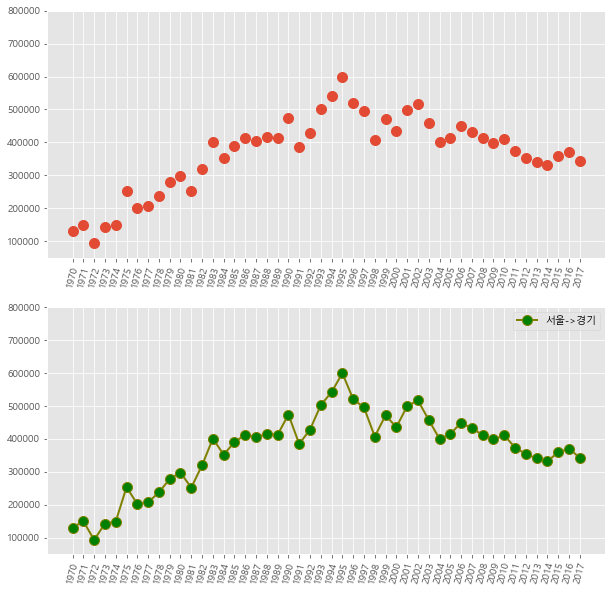

In [36]:
#<예제 4-8> 화면 분할하여 표시하기 - axe객체

import pandas as pd
import matplotlib.pyplot as plt # 데이터 시각화에사용될 모듈

# matplotlib 한글 폰트 문제 오류 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf" # 폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family = font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx",fillna = 0, header = 0) # fillna =0  :  , header= 0 : 0행을 열 이름으로 지정한다.

print(df.head())
df = df.fillna(method = "ffill")
mask = (df["전출지별"] =="서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"], axis =1) 
df_seoul.rename({"전입지별":"전입지"},axis =1, inplace = True)
df_seoul.set_index(["전입지"],inplace = True)

#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc["경기도"]

# 스타일 서식 지정
plt.style.use("ggplot")

# 그래프 객체 생성(figure에2개의 서브 플롯 생성)
fig = plt.figure(figsize = (10,10)) # 그림틀(fig)의 크기 지정
ax1 = fig.add_subplot(2,1,1) # axe객체 만들기
ax2 = fig.add_subplot(2,1,2)

# axe객체에 plot 함수로 그래프 출력
ax1.plot(sr_one,"o", markersize =10) # 선표시 X
ax2.plot(sr_one, marker="o",markerfacecolor = "green",markersize =10,color = "olive",linewidth = 2, label = "서울->경기")
ax2.legend (loc = "best" ) # 라벨 생성

#y축 범위 지적(최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈급 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation =75)
ax2.set_xticklabels(sr_one.index, rotation =75)

plt.show()

   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

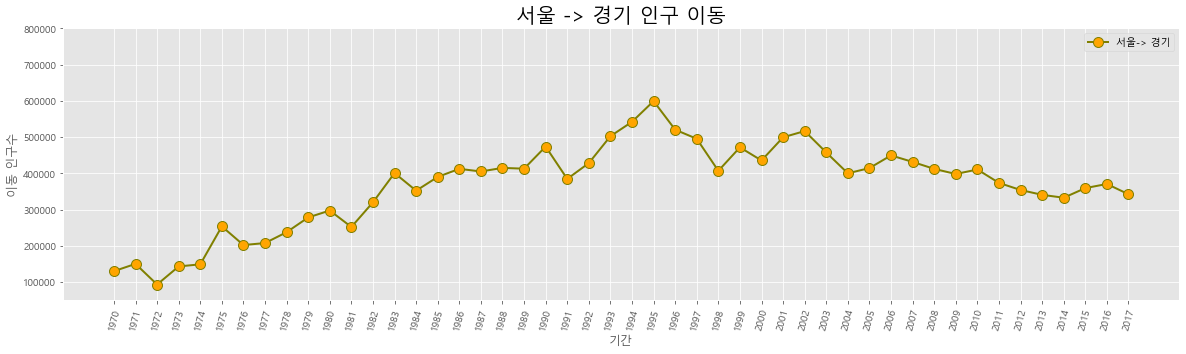

In [40]:
# axe객체 꾸미기

#<예제 4-8> 화면 분할하여 표시하기 - axe객체

import pandas as pd
import matplotlib.pyplot as plt # 데이터 시각화에사용될 모듈

# matplotlib 한글 폰트 문제 오류 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf" # 폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family = font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx",fillna = 0, header = 0) # fillna =0  :  , header= 0 : 0행을 열 이름으로 지정한다.

print(df.head())
df = df.fillna(method = "ffill")
mask = (df["전출지별"] =="서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"], axis =1) 
df_seoul.rename({"전입지별":"전입지"},axis =1, inplace = True)
df_seoul.set_index(["전입지"],inplace = True)

#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc["경기도"]

# 스타일 서식 지정
plt.style.use("ggplot")

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1) # axe객체 만들기

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker = "o", markerfacecolor = "orange", markersize =10, color = "olive",linewidth = 2, label = '서울-> 경기')
ax.legend(loc="best") # 라벨 생성

#y축 범위 지적
ax.set_ylim(50000,800000)

# 차트 제목 추가
ax.set_title("서울 -> 경기 인구 이동", size = 20)

# 축 이름 추가
ax.set_xlabel("기간", size = 12)
ax.set_ylabel("이동 인구수", size = 12 )

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation = 75)

# 축 눈금 라벨 크기
ax.tick_params(axis ="x", labelsize = 10)
ax.tick_params(axis ="y", labelsize = 10)

plt.show()

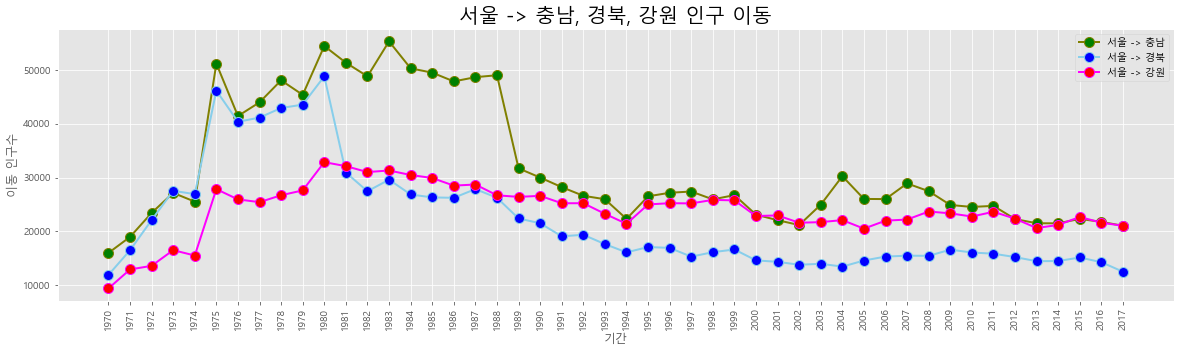

In [43]:
#<예제 4-10> 같은 화면에 여러개의 그래프 그리기

import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 해결

from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx", fillna =0, header = 0)
df = df.fillna(method = "ffill")

mask = (df["전출지별"] == "서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"],axis =1)
df_seoul.rename({"전입지별":"전입지",}, axis =1, inplace =True)
df_seoul.set_index("전입지",inplace = True)

# 서울에서"충청남도", "경상북도", "강원도"로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970,2018)))
df_3 = df_seoul.loc[["충청남도","경상북도","강원도"], col_years]

# 스타일 서식 지정
plt.style.use("ggplot")

# 그래프 객체 생성(figure에 1개의서브 플롯 생성)
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 여러개 출력
ax.plot(col_years, df_3.loc["충청남도",:], marker = "o", markerfacecolor = "green",
       markersize = 10, color = "olive", linewidth = 2, label = "서울 -> 충남")
ax.plot(col_years, df_3.loc["경상북도",:], marker = "o", markerfacecolor = "blue",
       markersize = 10, color = "skyblue", linewidth = 2, label = "서울 -> 경북")
ax.plot(col_years, df_3.loc["강원도",:], marker = "o", markerfacecolor = "red",
       markersize = 10, color = "magenta", linewidth = 2, label = "서울 -> 강원")


#범례 표시
ax.legend(loc = "best")

# 차트 제목 추가
ax.set_title("서울 -> 충남, 경북, 강원 인구 이동", size = 20)

#축 이름 추가
ax.set_xlabel("기간",size = 12)
ax.set_ylabel("이동 인구수", size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation = 90)

# 축 눈금 라벨 크기
ax.tick_params(axis ="x" , labelsize = 10)
ax.tick_params(axis ="y" , labelsize = 10)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

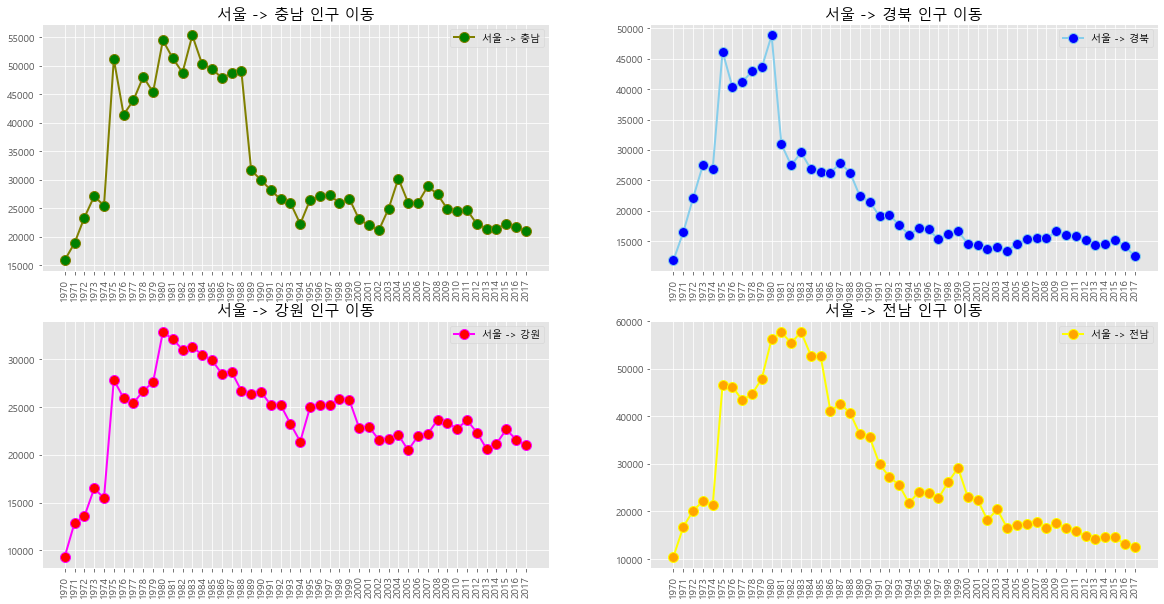

In [44]:
#<예제 4-11> 화면4분할 그래프 그리기

import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 해결

from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx", fillna =0, header = 0)
df = df.fillna(method = "ffill")

mask = (df["전출지별"] == "서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"],axis =1)
df_seoul.rename({"전입지별":"전입지",}, axis =1, inplace =True)
df_seoul.set_index("전입지",inplace = True)

# 서울에서 "충청남도", "경상북도", "강원도", "전라남도"로 이동한 인구데이터 값만 선택
col_years = list(map(str,range(1970, 2018)))
df_4 = df_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_years]

# 스타일 지정
plt.style.use("ggplot")

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# axe객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc["충청남도",:], marker ="o", markerfacecolor = "green",
        markersize = 10, color = "olive", linewidth = 2, label= "서울 -> 충남")
ax2.plot(col_years, df_4.loc["경상북도",:], marker ="o", markerfacecolor = "blue",
        markersize = 10, color = "skyblue", linewidth = 2, label= "서울 -> 경북")
ax3.plot(col_years, df_4.loc["강원도",:], marker ="o", markerfacecolor = "red",
        markersize = 10, color = "magenta", linewidth = 2, label= "서울 -> 강원")
ax4.plot(col_years, df_4.loc["전라남도",:], marker ="o", markerfacecolor = "orange",
        markersize = 10, color = "yellow", linewidth = 2, label= "서울 -> 전남")

# 범례 표시
ax1.legend(loc="best")
ax2.legend(loc="best")
ax3.legend(loc="best")
ax4.legend(loc="best")

# 차트 제목 추가
ax1.set_title("서울 -> 충남 인구 이동", size = 15)
ax2.set_title("서울 -> 경북 인구 이동", size = 15)
ax3.set_title("서울 -> 강원 인구 이동", size = 15)
ax4.set_title("서울 -> 전남 인구 이동", size = 15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation = 90)
ax2.set_xticklabels(col_years, rotation = 90)
ax3.set_xticklabels(col_years, rotation = 90)
ax4.set_xticklabels(col_years, rotation = 90)

plt.show

면적 그래프
- plot()메소드에 kind = "area" 옵션 사용
- stacked = 옵션 : 그래프를 누적할지
    - True 기본값
- alpha = 옵션 : 투명소 
    - 0.5 기본값

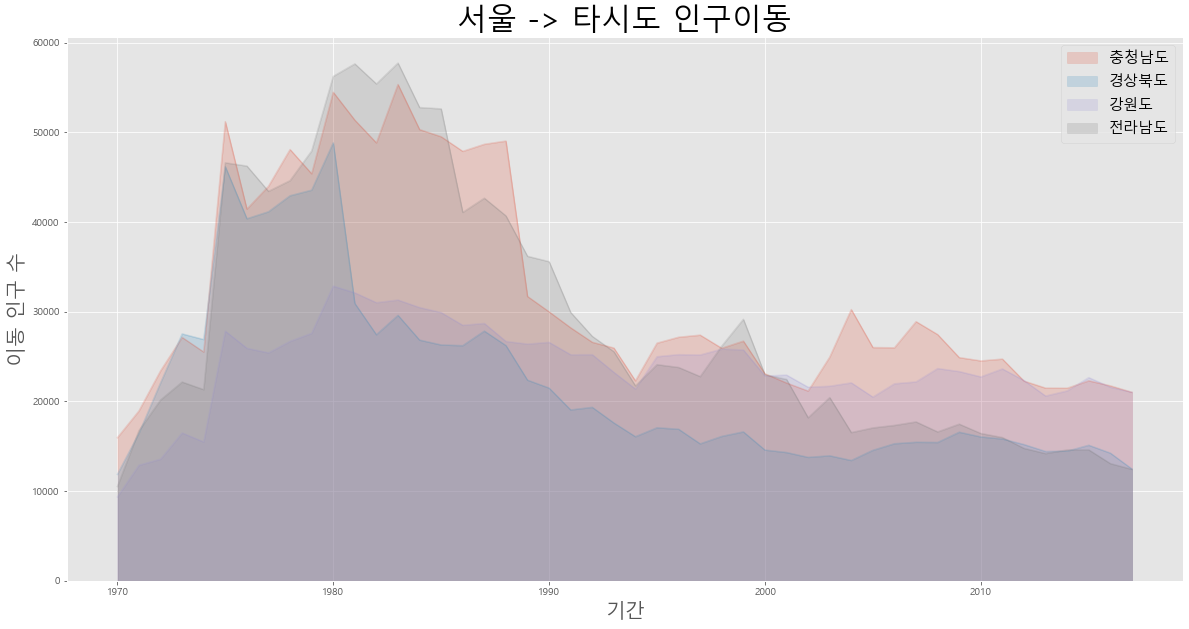

In [4]:
#<예제 4-13> 면적 그래프 (stacked = False) 그리기

import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 해결

from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx", fillna =0, header = 0)
df = df.fillna(method = "ffill")

mask = (df["전출지별"] == "서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"],axis =1)
df_seoul.rename({"전입지별":"전입지",}, axis =1, inplace =True)
df_seoul.set_index("전입지",inplace = True)

# 서울에서 "충청남도", "경상북도", "강원도", "전라남도"로 이동한 인구데이터 값만 선택
col_years = list(map(str,range(1970, 2018)))
df_4 = df_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_years]
df_4 = df_4.T

# 스타일 지정
plt.style.use("ggplot")

# 데이터프레임의인덱스를 정수형으로 변경(X축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind = "area", stacked = False, alpha = 0.2, figsize =(20,10))

plt.title("서울 -> 타시도 인구이동", size = 30)
plt.ylabel("이동 인구 수", size  = 20)
plt.xlabel("기간", size = 20)
plt.legend(loc = "best", fontsize = 15)

plt.show()

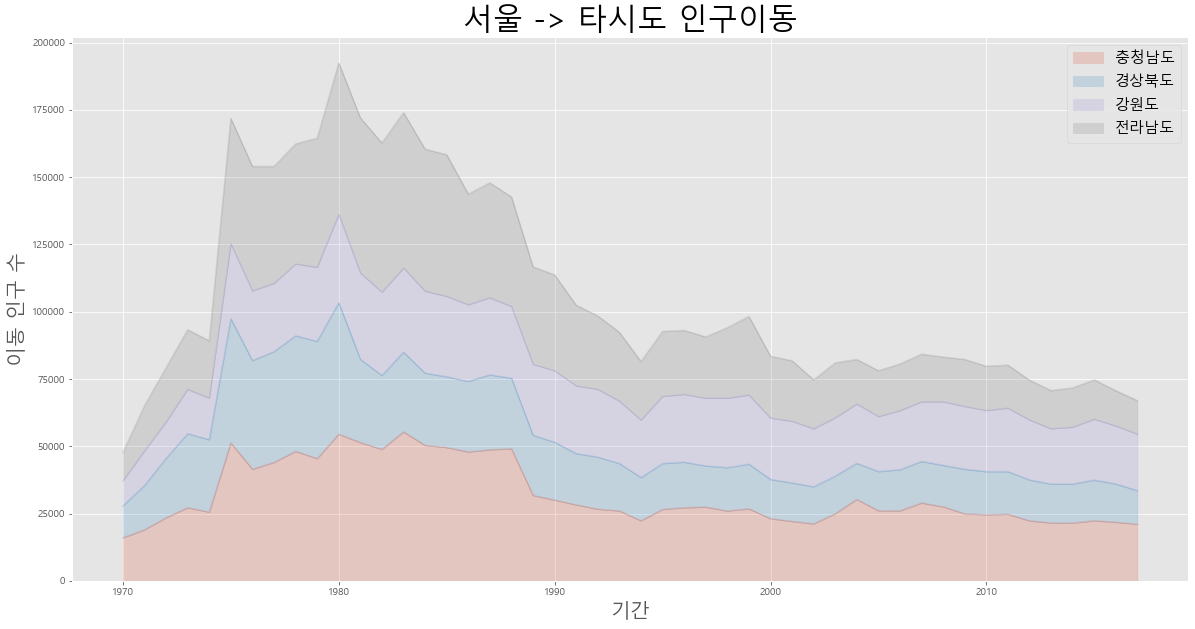

In [5]:
#<예제 4-13> 면적 그래프 (stacked = True) 그리기

import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 해결

from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx", fillna =0, header = 0)
df = df.fillna(method = "ffill")

mask = (df["전출지별"] == "서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"],axis =1)
df_seoul.rename({"전입지별":"전입지",}, axis =1, inplace =True)
df_seoul.set_index("전입지",inplace = True)

# 서울에서 "충청남도", "경상북도", "강원도", "전라남도"로 이동한 인구데이터 값만 선택
col_years = list(map(str,range(1970, 2018)))
df_4 = df_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_years]
df_4 = df_4.T

# 스타일 지정
plt.style.use("ggplot")

# 데이터프레임의인덱스를 정수형으로 변경(X축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind = "area", stacked = True, alpha = 0.2, figsize =(20,10))

plt.title("서울 -> 타시도 인구이동", size = 30)
plt.ylabel("이동 인구 수", size  = 20)
plt.xlabel("기간", size = 20)
plt.legend(loc = "best", fontsize = 15)

plt.show()

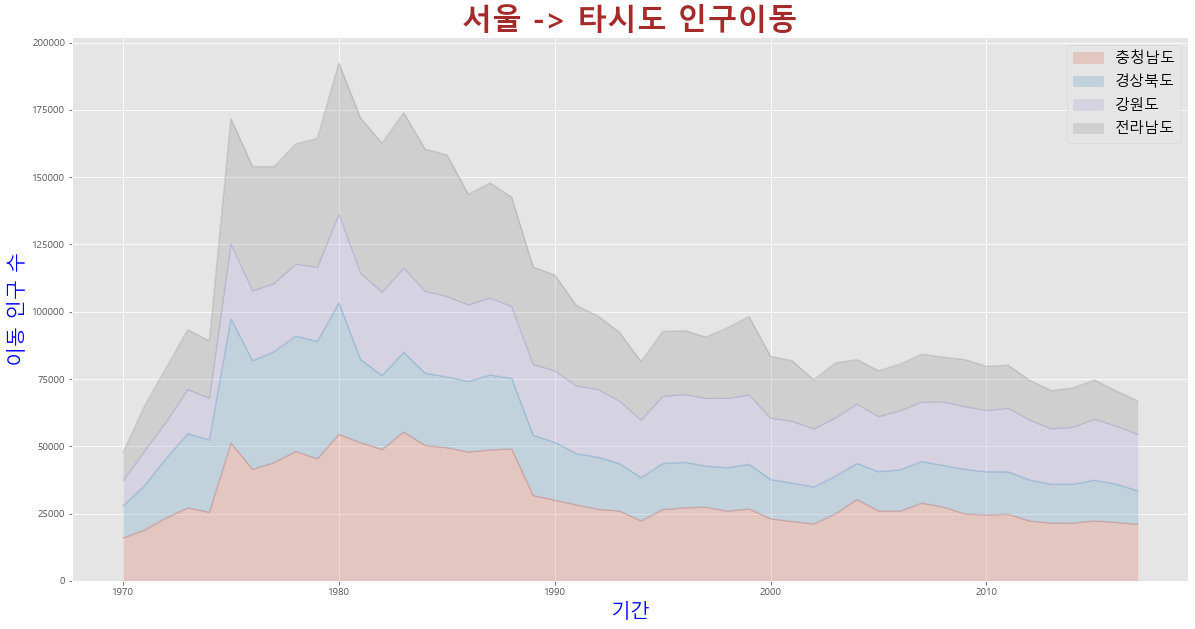

In [7]:
#<예제 4-15> axes 객체 속성 변경하기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 해결

from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx", fillna =0, header = 0)
df = df.fillna(method = "ffill")

mask = (df["전출지별"] == "서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"],axis =1)
df_seoul.rename({"전입지별":"전입지",}, axis =1, inplace =True)
df_seoul.set_index("전입지",inplace = True)

# 서울에서 "충청남도", "경상북도", "강원도", "전라남도"로 이동한 인구데이터 값만 선택
col_years = list(map(str,range(1970, 2018)))
df_4 = df_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_years]
df_4 = df_4.T

# 스타일 지정
plt.style.use("ggplot")

# 데이터프레임의인덱스를 정수형으로 변경(X축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
ax = df_4.plot(kind = "area", stacked = True, alpha = 0.2, figsize =(20,10))

ax.set_title("서울 -> 타시도 인구이동", size = 30, color = "brown", weight = "bold")
ax.set_ylabel("이동 인구 수", size  = 20, color = "blue")
ax.set_xlabel("기간", size = 20, color = "blue")
ax.legend(loc = "best", fontsize = 15)

plt.show()

막대 그래프
- plot() 메소드에 kind ="bar" 옵션 사용
    - 세로형 막대 그래프
- plot() 메소드에 kind = "barh" 옵션 사용
    - 가로형 막대 그래프

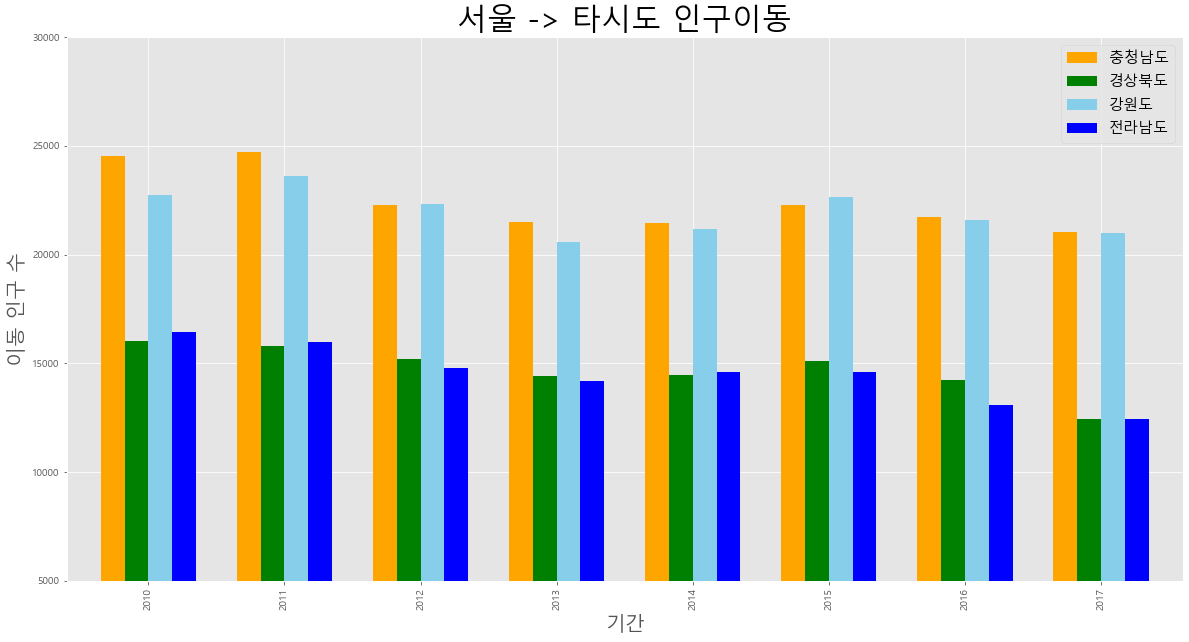

In [9]:
#<예제 4-16> 세로형 막대 그래프
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 해결

from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx", fillna =0, header = 0)
df = df.fillna(method = "ffill")

mask = (df["전출지별"] == "서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"],axis =1)
df_seoul.rename({"전입지별":"전입지",}, axis =1, inplace =True)
df_seoul.set_index("전입지",inplace = True)

# 서울에서 "충청남도", "경상북도", "강원도", "전라남도"로 이동한 인구데이터 값만 선택
col_years = list(map(str,range(2010, 2018)))
df_4 = df_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_years]
df_4 = df_4.T

# 스타일 지정
plt.style.use("ggplot")

# 데이터프레임의인덱스를 정수형으로 변경(X축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind = "bar", figsize =(20,10), width = 0.7,
         color = ["orange","green","skyblue","blue"])

plt.title("서울 -> 타시도 인구이동", size = 30)
plt.ylabel("이동 인구 수", size  = 20)
plt.xlabel("기간", size = 20)
plt.ylim(5000,30000)
plt.legend(loc = "best", fontsize = 15)

plt.show()

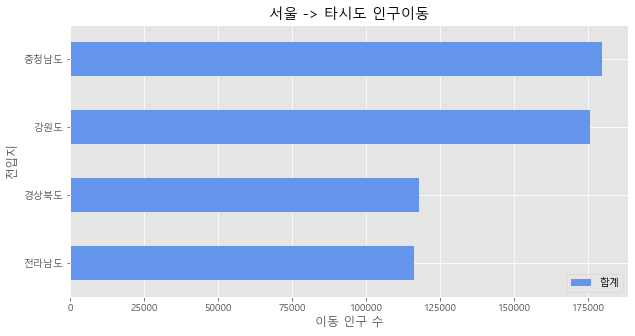

In [11]:
#<예제 4-17> 가로형 막대그래프
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 해결

from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx", fillna =0, header = 0)
df = df.fillna(method = "ffill")

mask = (df["전출지별"] == "서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"],axis =1)
df_seoul.rename({"전입지별":"전입지",}, axis =1, inplace =True)
df_seoul.set_index("전입지",inplace = True)

# 서울에서 "충청남도", "경상북도", "강원도", "전라남도"로 이동한 인구데이터 값만 선택
col_years = list(map(str,range(2010, 2018)))
df_4 = df_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_years]

# 2010-2017년 이동 인구수를 합계하여 새로운 열로 추가
df_4["합계"] = df_4.sum(axis=1)

#가장 큰 값부터 정렬
df_total = df_4[["합계"]].sort_values(by="합계", ascending = True)

# 스타일 지정
plt.style.use("ggplot")

# 면적 그래프 그리기
df_total.plot(kind = "barh", figsize =(10,5), width = 0.5,
         color = "cornflowerblue")

plt.title("서울 -> 타시도 인구이동")
plt.xlabel("이동 인구 수")
plt.ylabel("전입지")


plt.show()

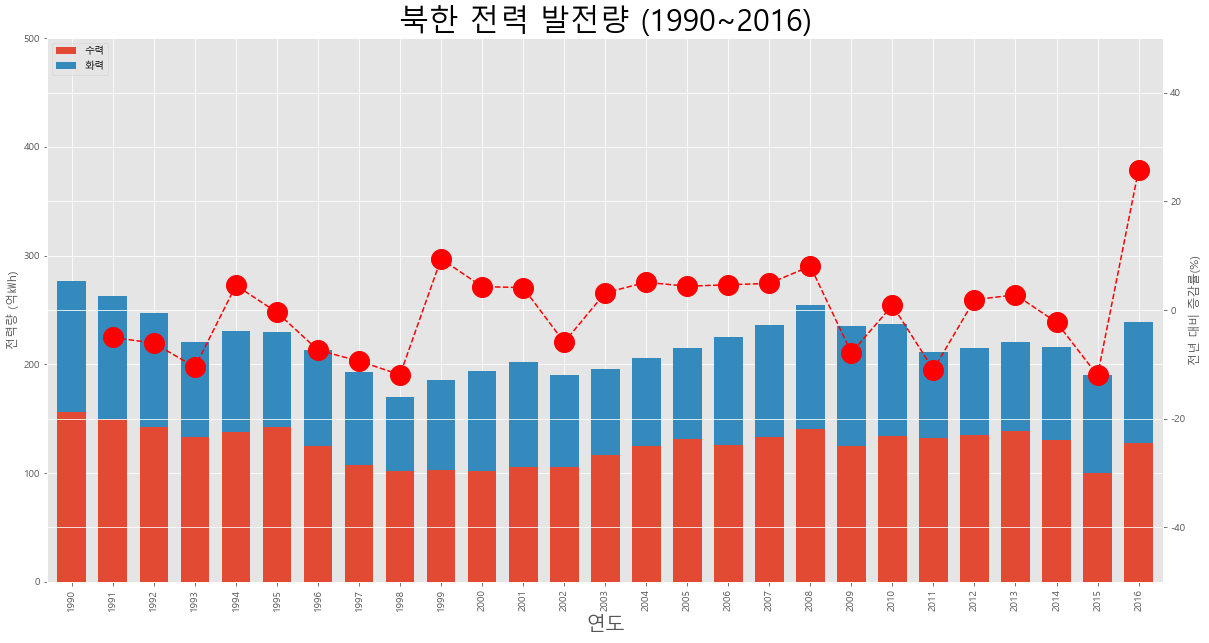

In [22]:
# <예제 4-18> 2축 그랴프 그리기

import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family=font_name)

plt.style.use("ggplot") # 스타일 서식 지정
plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호출력 설정

# Excle 데이터를 데이터프레임으로 변환
df = pd.read_excel("./남북한발전전력량.xlsx", covert_float=True)
df = df.loc[5:9]
df.drop("전력량 (억㎾h)", axis = "columns", inplace = True)
df.set_index("발전 전력별", inplace = True)
df = df.T

# 증감률(변동률) 계산
df=df.rename(columns = {"합계":"총발전량"})
df["총발전량 - 1년"]= df["총발전량"].shift(1)
df["증감률"] = ((df["총발전량"]/df["총발전량 - 1년"]) - 1) * 100

# 2 축 그래프 그리기
ax1 = df[["수력","화력"]].plot(kind = "bar", figsize = (20,10), width = 0.7, stacked =True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률,ls="--", marker = "o", markersize =20,
        color = "red", label ="전년대비 증감률(%)")

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel("연도", size = 20)
ax1.set_ylabel("전력량 (억㎾h)")
ax2.set_ylabel("전년 대비 증감률(%)")

plt.title("북한 전력 발전량 (1990~2016)", size = 30)
ax1.legend(loc = "upper left")

plt.show()

히스토 그램
- plot() 메소드에 kind = "hist" 옵션 사용
- bins = 수 옵션 : 구간을 나눈다.

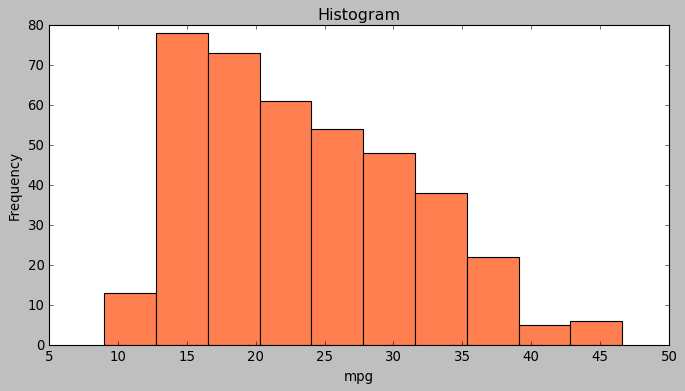

In [24]:
# <예제 4-19> 히스토그램

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("classic")

df = pd.read_csv("./auto-mpg.csv", header =None)

df.columns = ["mpg", "cylinders", "displacement","horsepower","weight","acceleration","model year", "origin","name"]

#연비(mpg) 열에 대한 히스토그램 그리기
df["mpg"].plot(kind = "hist", bins = 10, color ="coral", figsize = (10,5))

# 그래프 꾸미기
plt.title("Histogram")
plt.xlabel("mpg")
plt.show()

산점도
- plot() 메소드에 kind = "scatter" 옵션 사용
- x = "변수1", y = "변수2" 옵션으로 비교할 변수 선택
- c = "색상", s = 점 크기

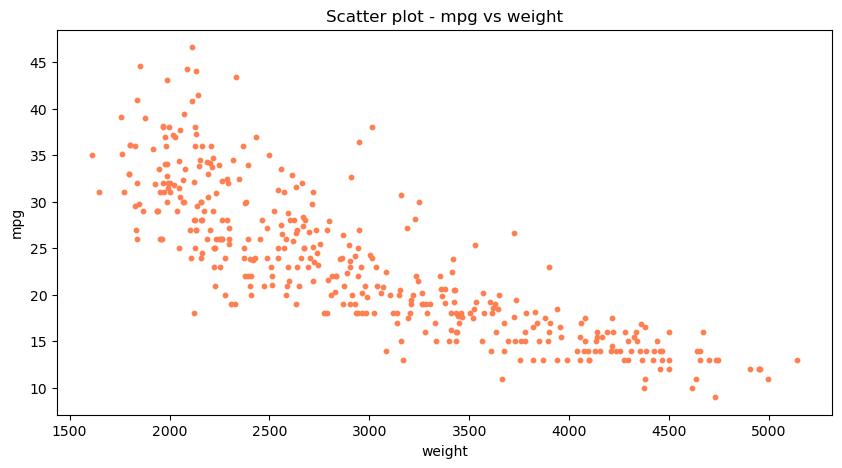

In [26]:
# <예제 4-20> 산점도

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")

df = pd.read_csv("./auto-mpg.csv", header = None)

df.columns =["mpg", "cylinders", "displacement","horsepower","weight","acceleration","model year", "origin","name"]

df.plot(kind = "scatter", x = "weight", y = "mpg", c = "coral", s= 10, figsize =(10,5))
plt.title("Scatter plot - mpg vs weight")
plt.show()

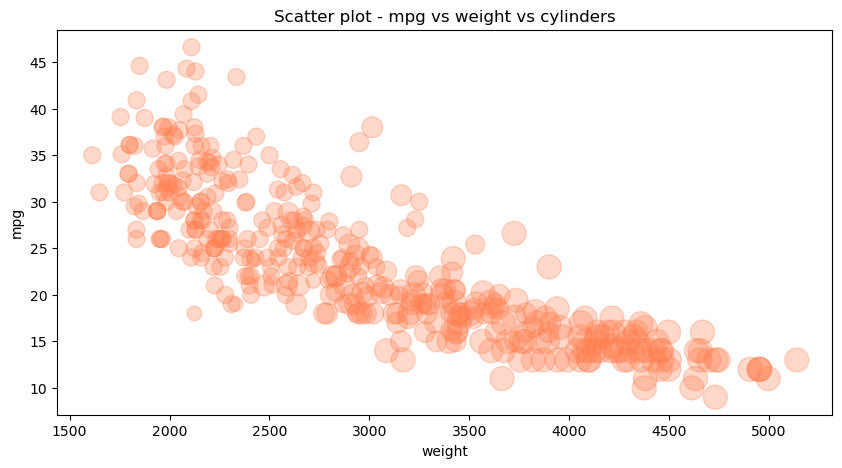

In [30]:
# <예제 4-21> 버블 차트

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")

df = pd.read_csv("./auto-mpg.csv", header = None)

df.columns =["mpg", "cylinders", "displacement","horsepower","weight","acceleration","model year", "origin","name"]

# cylinders 개수의 상대적 비율을계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max() * 300

# 3개변수로 산점도 그리기
df.plot(kind = "scatter", x = "weight", y = "mpg", c = "coral", s= cylinders_size, alpha = 0.3, figsize =(10,5))
plt.title("Scatter plot - mpg vs weight vs cylinders")
plt.show()

파이 차트
- plot()메소드에 kind = "pie" 옵션 사용
- autopct = "%1.1f%%" : 퍼센트% 표시 옵션
- startangle = : 파이 조각을 나누는 시작점 옵션
- plt.axis("equal") : 파이 차트의 비율을 같게(원에 가깝게 ) 조정

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


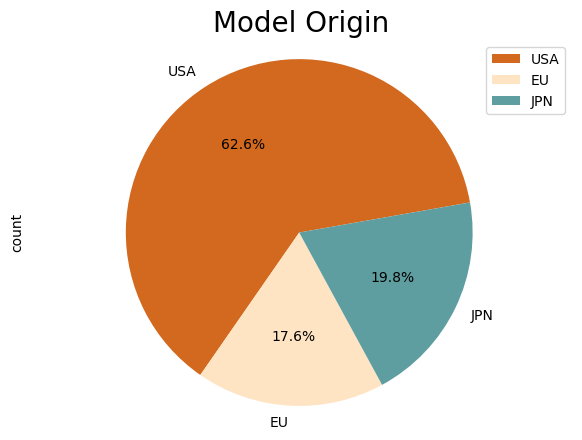

In [37]:
# <예제 4-23>파이 차트

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")

df = pd.read_csv("./auto-mpg.csv", header = None)

df.columns = ["mpg", "cylinders", "displacement","horsepower","weight","acceleration","model year", "origin","name"]

# 데이터 개수카운트를 위해 값 1을 가진 열 추가
df["count"] = 1
df_origin =df.groupby("origin").sum() # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())

# count 를 파이 차트로만든다

# 제조국가(origin) 값을 실제 지역명을 변경
# 1 -> "USA", 2 -> "EU", 3 -> "JPN"
df_origin.index = ["USA","EU","JPN"]

#제조국가(origin) 열에대한 파이 차트그리기 - count 열 데이터 사용
df_origin["count"].plot(kind = "pie",
                       figsize = (7,5),
                        autopct = "%1.1f%%", # 퍼센트%표시
                        startangle = 10, # 파이 조각을 나누는 시작점(각도 표시)
                        colors =["chocolate", "bisque","cadetblue"]
                       )

plt.title("Model Origin", size = 20)
plt.axis("equal") # 파이 차트의 비율을 같게(원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc ="upper right") # 범례 표시
plt.show()

박스 플롯
- 5개 통계 지표 (최소값, 1분위값, 중간값, 3분위값, 최대값) 제공

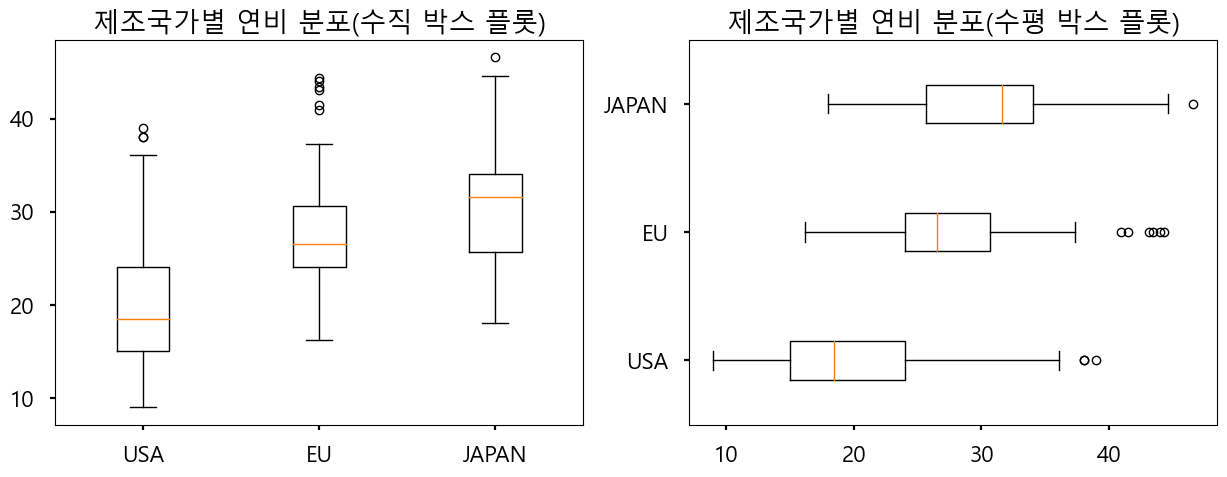

In [42]:
# <예제 4-24> 박스 플롯

import pandas as pd
import matplotlib.pyplot as plt

# 한글폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family= font_name)

plt.style.use("seaborn-poster")
plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호 출력 설정

df = pd.read_csv("./auto-mpg.csv", header = None)

df.columns = ["mpg", "cylinders", "displacement","horsepower","weight","acceleration","model year", "origin","name"]

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# axe 객체에  boxplot메소드로 그래프 출력
ax1.boxplot(x = [df[df["origin"]==1]["mpg"],
                df[df["origin"]==2]["mpg"],
                df[df["origin"]==3]["mpg"]],
           labels = ["USA", "EU", "JAPAN"])

ax2.boxplot(x = [df[df["origin"]==1]["mpg"],
                df[df["origin"]==2]["mpg"],
                df[df["origin"]==3]["mpg"]],
           labels = ["USA", "EU", "JAPAN"],
           vert = False)

ax1.set_title("제조국가별 연비 분포(수직 박스 플롯)")
ax2.set_title("제조국가별 연비 분포(수평 박스 플롯)")

plt.show()